Nicole David

IST362 - Final Project

# **Quantum Coin Game**

### **How to play in human terms**

The quantum coin game involves a coin, a quantum computer, and a human. At the start of the game, the quantum computer puts a coin into superposition. Then, the human can decide to flip the coin, or not. In the last round, the quantum computer either flips the coin, or not.

At the end of the game, if the revealed coin is heads up, the quantum computer wins.

## **How to play in quantum computing terms**

**The coin** is represented by a single qubit gate:

$$
      |\psi\rangle=\begin{bmatrix}\alpha \\ \beta\end{bmatrix}
$$

where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$.

**Heads** looks like:
$$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

**Tails** looks like:

$$|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

The **Hadamard operator** is what puts the coin into superposition:

$$H = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 & 1 \\ 1 & -1 \end{bmatrix}$$

**A coin in superposition** looks like:

$$H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 \\ 1 \end{bmatrix}$$

A human can **flip the coin** by applying a bit-flip operator:

$$
  X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

A quantum computer can **flip the coin** by applying the Hadamard gate.


## Set up the game:

In [ ]:
# things you may need to install and then restart the kernel
#!pip install --upgrade pip
#!pip install qiskit
#!pip install pylatexenc
#!pip install qiskit-Aer
#!pip install qiskit-ibmq-provider

In [1]:
# Importing all the necessary library

from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.tools.jupyter
import ipywidgets as widgets

In [2]:
# Building the initial circuit

def initial_circuit():
    circuit = QuantumRegister(1, 'circuit')
    measure = ClassicalRegister(1, 'result')
    qc = QuantumCircuit(circuit, measure)
    qc.draw('mpl')
    return qc, circuit, measure

In [3]:
# Widget Initialization

gate = widgets.Dropdown(
    options=[('Identity', 'i'), ('Bit Flip', 'x')],
    description='Choice: ',
    disabled=False,
)

## Build the initial circuit

In [4]:
qc, circuit, measure = initial_circuit()

## Put your coin in superposition:

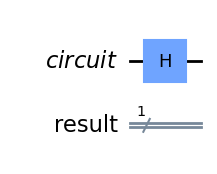

In [5]:
# Use H Gate

qc.h(circuit[0])
qc.draw('mpl')

## Human's turn: flip the coin, or not

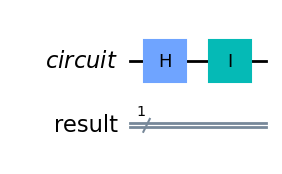

In [6]:
if gate.value == 'i':
    qc.i(circuit[0])
if gate.value == 'x':
    qc.x(circuit[0])

qc.draw('mpl')

## Quantum Computer's turn:

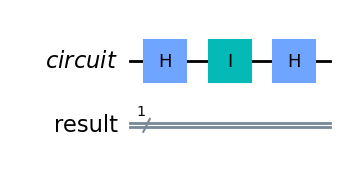

In [7]:
# Used H Gate

qc.h(circuit[0])
qc.draw('mpl')

## Measurement:

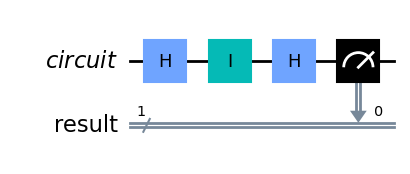

In [8]:
qc.measure(circuit, measure)
qc.draw('mpl')

## QASM_Simulator

{'0': 8192}


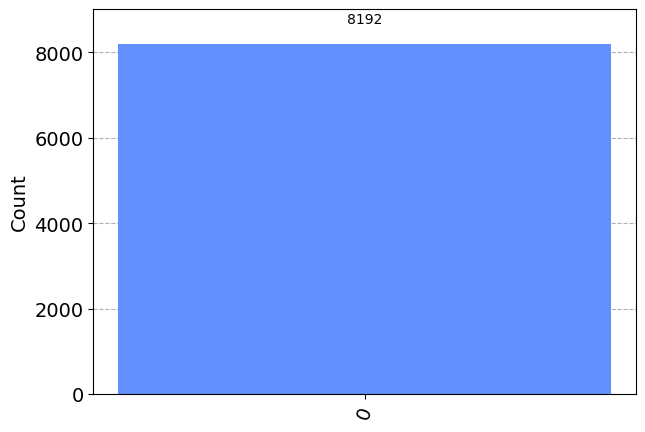

In [9]:
# if you have not already, you probably need to install qiskit-aer to run this
#!pip install qiskit-Aer

backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend, shots=8192)
res = job.result().get_counts()
print(res)
plot_histogram(res)

## Who Wins?

In [10]:
if len(res) == 1 and list(res.keys())[0] == '0':
    print("Quantum Computer Wins")
if len(res) == 1 and list(res.keys())[0] == '1':
    print("Classical Human Wins")
if len(res) == 2:
    print("Either Quantum Computer or Classical Human Wins")

Quantum Computer Wins


### In this perfect simulation, the computer won every single time.

### What happens when we play with an actual quantum computer?

In [11]:
from qiskit import IBMQ
IBMQ.save_account('') #put your api key here

Traceback (most recent call last):
  Cell In[11], line 2
    IBMQ.save_account('') #put your api key here
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/ibmqfactory.py:257 in save_account
    raise IBMQAccountCredentialsInvalidToken(
IBMQAccountCredentialsInvalidToken: 'Invalid IBM Quantum Experience token found: "" of type <class \'str\'>.'

Use %tb to get the full traceback.


/tmp/ipykernel_163/3331772826.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('') #put your api key here


In [ ]:
#if you have not already, install this and restart after installing
#!pip install qiskit-ibmq-provider
provider = IBMQ.load_account()
backend_real = provider.get_backend('ibm_kyoto')
job_real = execute(qc, backend_real, shots=8192)
res_real = job_real.result().get_counts()
print(res_real)
plot_histogram(res_real)

### Results:

**ibm_brisbane - 1st Run - 92.8%**
* Created: Nov 30, 2023 10:33 AM
* In queue: 5h 11m 1.2s
* Running: Nov 30, 2023 3:44 PM
* Qiskit runtime usage: 4s
* Completed: Nov 30, 2023 3:44 PM

**ibm_brisbane - 2nd Run - 90.6%**
* Created: Nov 30, 2023 3:51 PM
* In queue: 31m 4.3s
* Running: Nov 30, 2023 4:22 PM
* Qiskit runtime usage: 4s
* Completed: Nov 30, 2023 4:23 PM

**ibm_kyoto - 86%**
* Created: Nov 30, 2023 3:53 PM
* In queue: 1m 34.8s
* Running: Nov 30, 2023 3:55 PM
* Qiskit runtime usage: 4s
* Completed: Nov 30, 2023 3:57 PM

# Why does the quantum computer win (nearly) every time?

### **The short answer:**
* Putting the coin in superposition eliminates its binary nature. 'Flipping the coin' in this game is less like changing from one state to another and more like mixing a solution that is already mixed. By flipping the coin/applying a Hadamard gate in the final turn, the quantum computer can always return the coin back to its original state.

### **The mathematical answer:**

* In this environment, non-quantum coins have an equal chance of showing heads or tails:

$$
      |\psi\rangle=\begin{bmatrix}\alpha \\ \beta\end{bmatrix}
$$

  where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$.

* Applying the Hadamard gate to a coin (initially showing heads, or |0>, in this example) puts it into superposition:
$$H|0\rangle = \frac{1}{\sqrt2}(|0\rangle + |1\rangle)$$

* A coin in superposition looks like:
$$H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 \\ 1 \end{bmatrix}$$

* When the human player chooses whether to flip the coin (apply the $X$ operator) or not (apply the $I$ operator), the state will always be $|+\rangle$ because $X$ operator just flips the state vector upside down and essentially has no effect.

$$ X|+\rangle=|+\rangle $$
$$ I|+\rangle=|+\rangle $$

* At the end, the quantum computer puts the coin back into superposition by applying the Hadamard gate to put it in the 'heads' state.

$$H|+\rangle = |0\rangle$$

In the end, whether the human player flips the coin or not, it does not matter because as long as the quantum computer flips the coin by applying a second Hadamard gate, the result will always match the initial state of the coin:


<table>
<tr>
    <th>Start State</th>
    <th>Superposition</th>
    <th>Classical</th>
    <th>Quantum</th>
    <th>Result</th>
    <th>Who Wins?</th>
</tr>
<tr>
    <td>$|0\rangle$</td>
    <td>$H$</td>
    <td>$I$</td>
    <td>$H$</td>
    <td>$|0\rangle$</td>
    <td>Quantum</td>
</tr>
<tr>
    <td>$|0\rangle$</td>
    <td>$H$</td>
    <td>$X$</td>
    <td>$H$</td>
    <td>$|0\rangle$</td>
    <td>Quantum</td>
</tr>

</table>

### What happens if the human goes first?

In [12]:
qc_h, circuit_h, measure_h = initial_circuit()

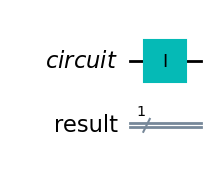

In [13]:
qc_h.i(circuit_h[0])

qc_h.draw('mpl')

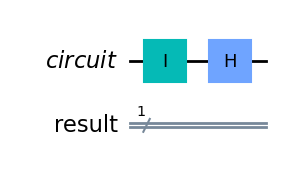

In [14]:
# Use H Gate

qc_h.h(circuit_h[0])
qc_h.draw('mpl')

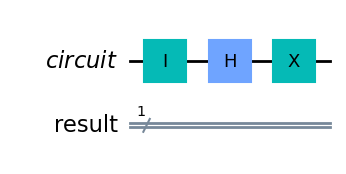

In [15]:
qc_h.x(circuit_h[0])
qc_h.draw('mpl')

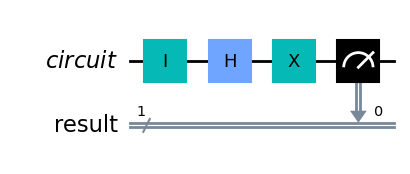

In [16]:
qc_h.measure(circuit_h, measure_h)
qc_h.draw('mpl')

{'0': 4098, '1': 4094}


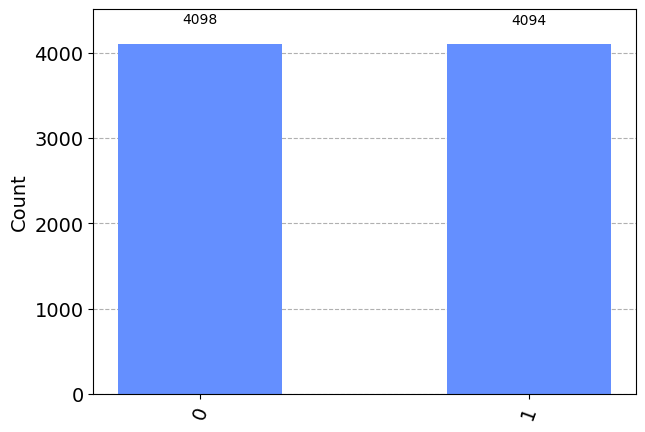

In [17]:
backend = Aer.get_backend('aer_simulator')
job_h = execute(qc_h, backend, shots=8192)
res_h = job_h.result().get_counts()
print(res_h)
plot_histogram(res_h)

In [18]:
if len(res_h) == 1 and list(res_h.keys())[0] == '0':
    print("Quantum Computer Wins")
if len(res_h) == 1 and list(res_h.keys())[0] == '1':
    print("Classical Human Wins")
if len(res_h) == 2:
    print("Either Quantum Computer or Classical Human Wins")

Either Quantum Computer or Classical Human Wins


In [ ]:
# run it on a real quantum system
# add in your IBM quantum API key in the line below with ' ' to run it on a real quantum computer
provider = IBMQ.load_account()
backend_real = provider.get_backend('ibm_brisbane')
job_real_h = execute(qc_h, backend_real, shots=8192)
res_real_h = job_real_h.result().get_counts()
print(res_real_h)
plot_histogram(res_real_h)

## Results:

**ibm_brisbane - Human first, 1st Run - 44.3%**
* Created: Nov 30, 2023 3:55 PM
* In queue: 28m 22.5s
* Running: Nov 30, 2023 4:23 PM
* Qiskit runtime usage: 4s
* Completed: Nov 30, 2023 4:23 PM


### Here's where I experimented to understand why this happened:

In [ ]:
# experiment here to see who wins on simulators
#qc_hn, circuit_hn, measure_hn = initial_circuit()
#qc_hn.h(circuit_hn[0])
#qc_hn.i(circuit_hn[0])
#qc_hn.h(circuit_hn[0])
#qc_hn.x(circuit_hn[0])
#qc_hn.h(circuit_hn[0])
#qc_hn.h(circuit_hn[0])
#qc_hn.measure(circuit_hn, measure_hn)
#qc_hn.draw('mpl')

In [ ]:
#backend = Aer.get_backend('aer_simulator')
#job_hn = execute(qc_hn, backend, shots=8192)
#res_hn = job_hn.result().get_counts()
#print(res_hn)
#plot_histogram(res_hn)

## Limitations:

### **Why does the quantum computer need an even number of Hadamard gates to win the game?**

A Hadamard gate rotates the qubit along a Bloch sphere (about 90 degrees on the y-axis and 180 degrees on the x-axis). The first rotation puts the qubit into superposition and the second rotation returns the qubit back to its original state.

Let's test this:

In [ ]:
qc_t, circuit_t, measure_t = initial_circuit()
#qc_t.h(circuit_t[0])
#qc_t.i(circuit_t[0])
#qc_t.h(circuit_t[0])
qc_t.x(circuit_t[0])
qc_t.h(circuit_t[0])
qc_t.h(circuit_t[0])
qc_t.measure(circuit_t, measure_t)
qc_t.draw('mpl')

In [ ]:
backend = Aer.get_backend('aer_simulator')
job_t = execute(qc_t, backend, shots=8192)
res_t = job_t.result()
res_t = job_t.result().get_counts()
print(res_t)
plot_histogram(res_t)

We can see that the quantum computer's manipulation of the Hadamard gate can only bring the coin back to its original position. To get the coin to show a state other than its initial position would require different operations than a Hadamard gate.

# Real World Applications:

In cryptography, the **coin flipping problem** refers to a situation wherein two remote players that do not trust each other must agree on a random bit by exchanging messages without relying on a third party. For example, if Alice and Bob were divorced and were on a phone call to determine who gets to keep the car, it would be hard for one of them to flip a coin and for the other to make a guess when it is assumed that one of them will be cheating. **Quantum coin flipping** is a method by which their communication over the phone call can be encrypted to ensure both parties are telling the truth. Using this methodology, Alice would convey a message with a random basis and random qubits, Bob would receive them and make a guess regarding what basis Alice used. If he's correct, he wins, and if not, he loses. Alice would then confirm the basis by sending the entire original qubit sequence and BOb would make sure that it matches what he originally received.